In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
path = r'C:\Users\nicol\OneDrive\Documents\Thesis\ANI_AAI\Figures'


data = pd.read_excel(path +'\\ANI_AAI_TestData.xlsx')

### display random data table

In [40]:
data

,Species 1,Species 2,Species 3,Species 4,Species 5,Species 6
Species 1,0,86,89,91,67,79
Species 2,80,0,87,55,69,75
Species 3,84,76,0,52,73,74
Species 4,52,65,55,0,98,71
Species 5,53,85,76,98,0,91
Species 6,67,82,73,79,54,0


### display raw heat map of data

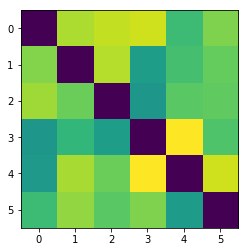

In [41]:
plt.imshow(data[data.columns[:]])

### checking column names

In [42]:
data.columns

Index(['Species 1', 'Species 2', 'Species 3', 'Species 4', 'Species 5',
       'Species 6'],
      dtype='object')

### this is an adapted heat map function from matplotlib suited for ANI/AAI data. Function will save a figure in the working directory "ANI_AAI_HeatMap.png".

In [68]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", swap_axes = 0, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        plt.figure(dpi = 300)
        ax = plt.gca()

    # Plot the heatmap
    if swap_axes:
        #default set to zero. to transpose this flag must be 1
        pltdata = data.T
    else:
        pltdata = data
    im = ax.imshow(pltdata, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(pltdata.shape[1]))
    ax.set_yticks(np.arange(pltdata.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, style = 'italic')
    ax.set_yticklabels(row_labels, style = 'italic')

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=50, ha="left",
             rotation_mode="anchor", fontstyle = 'italic')

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(pltdata.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(pltdata.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    
    plt.savefig('ANI_AAI_HeatMap', dpi = 300, bbox_inches = 'tight')
    
    return im, #cbar

### plot data is loaded (should be float). Row and column labels are also assigned. 

In [69]:
my_plot_data = data[data.columns[:]].astype(np.float)
my_row_labels = data.corr().columns 
my_col_labels = data.corr().columns

my_plot_data

,Species 1,Species 2,Species 3,Species 4,Species 5,Species 6
Species 1,0.0,86.0,89.0,91.0,67.0,79.0
Species 2,80.0,0.0,87.0,55.0,69.0,75.0
Species 3,84.0,76.0,0.0,52.0,73.0,74.0
Species 4,52.0,65.0,55.0,0.0,98.0,71.0
Species 5,53.0,85.0,76.0,98.0,0.0,91.0
Species 6,67.0,82.0,73.0,79.0,54.0,0.0


### Mask is  first applied to upper half of figure then transposed to fit lower half of figure. 

In [70]:
mask = np.zeros_like(my_plot_data)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, np.nan)
mask[mask == 0] = np.nan

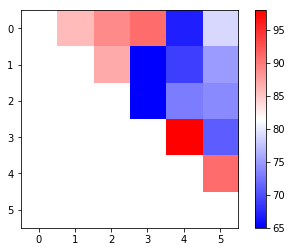

In [72]:
plt.imshow(my_plot_data * mask, cmap = 'bwr', vmin = 65) #cmap is the color map. vmin should be set based on the data min value.
plt.colorbar()

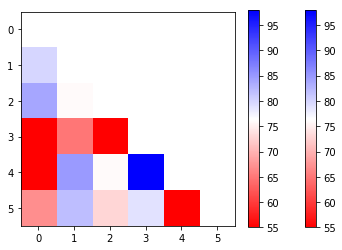

In [73]:
plt.imshow(my_plot_data * mask.T, cmap = 'bwr_r', vmin = 55) #cmap is the color map. vmin should be set based on the data min value.
plt.colorbar()
plt.colorbar()

In [74]:
from matplotlib import cm

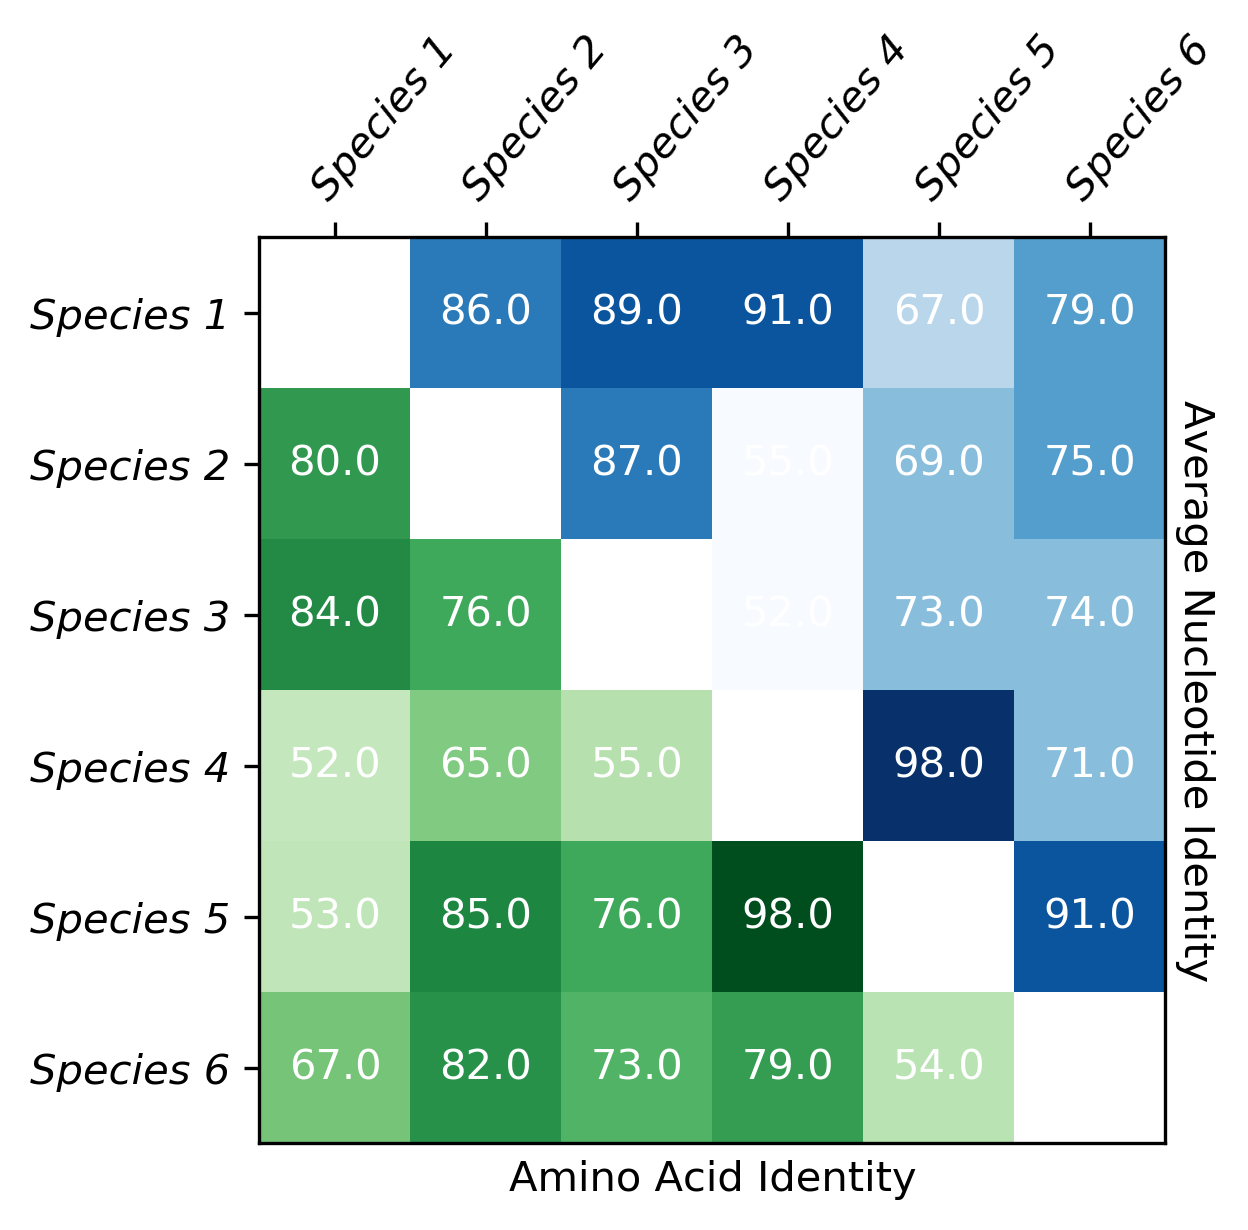

In [76]:
fig, ax = plt.subplots(1,1, dpi = 300)
a = plt.imshow(my_plot_data * mask, cmap = cm.get_cmap('Blues', 8), alpha = 1, vmin = 50, vmax = 100)

plt.imshow(my_plot_data * mask.T, cmap = cm.Greens, alpha = 1.0, vmin = 35, vmax = 100)

for i in range(my_plot_data.shape[0]):
    for j in range(my_plot_data.shape[1]):
        text = ax.text(j, i, my_plot_data.values[i, j],
                       ha="center", va="center", color="w")
ax.set_xticks(np.arange(my_plot_data.shape[1]))
ax.set_yticks(np.arange(my_plot_data.shape[0]))
# ... and label them with the respective list entries.
ax.set_xticklabels(my_col_labels, style = 'italic')


ax.set_yticklabels(my_row_labels, style = 'italic')
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=50, ha="left", rotation_mode="anchor", fontstyle = 'italic')

ax.set_xlabel('Amino Acid Identity')
ax.set_ylabel('Average Nucleotide Identity', rotation = 270, labelpad= 12), ax.yaxis.set_label_position('right')
plt.savefig('Gali_ANI_AAI', dpi = 300, bbox_inches = 'tight')


### The folowing two modules are making a color bar to be cut and pasted into the final figure. This is a band-aid method but it works for the application. 

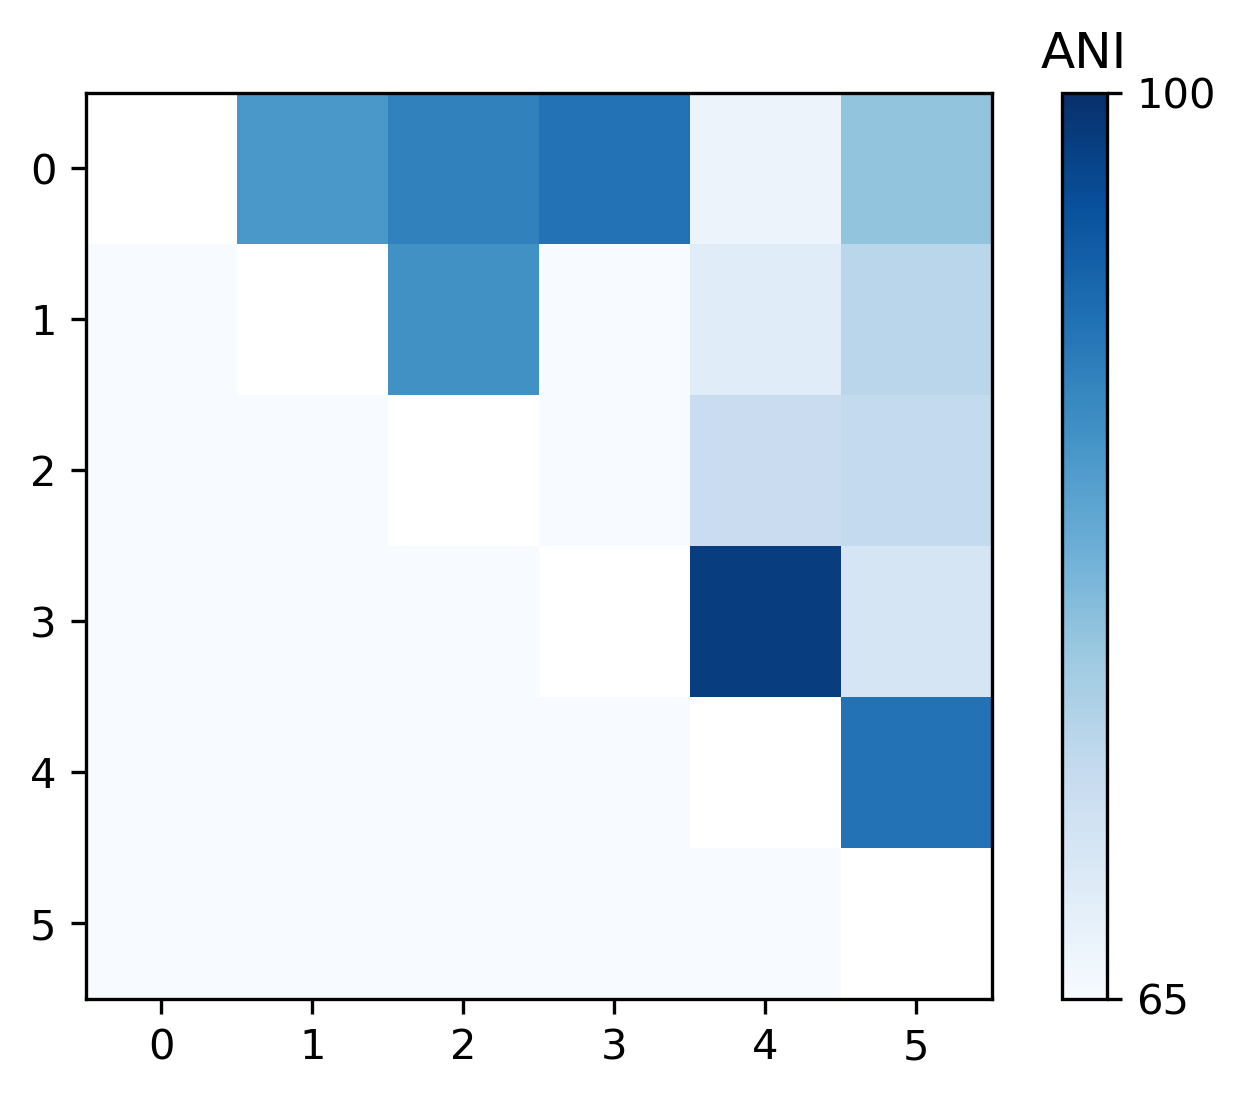

In [52]:
#ANI colorbar

fig, ax = plt.subplots(1,1, dpi = 300)
#vmin should match your data above and vmax should be 100
a = plt.imshow(my_plot_data * mask, cmap = cm.Blues, alpha = 1, vmin = 65, vmax = 100)
cb = plt.colorbar(a, ticks = [65, 100])
cb.ax.set_title("ANI")
plt.savefig('ANI', dpi = 300)



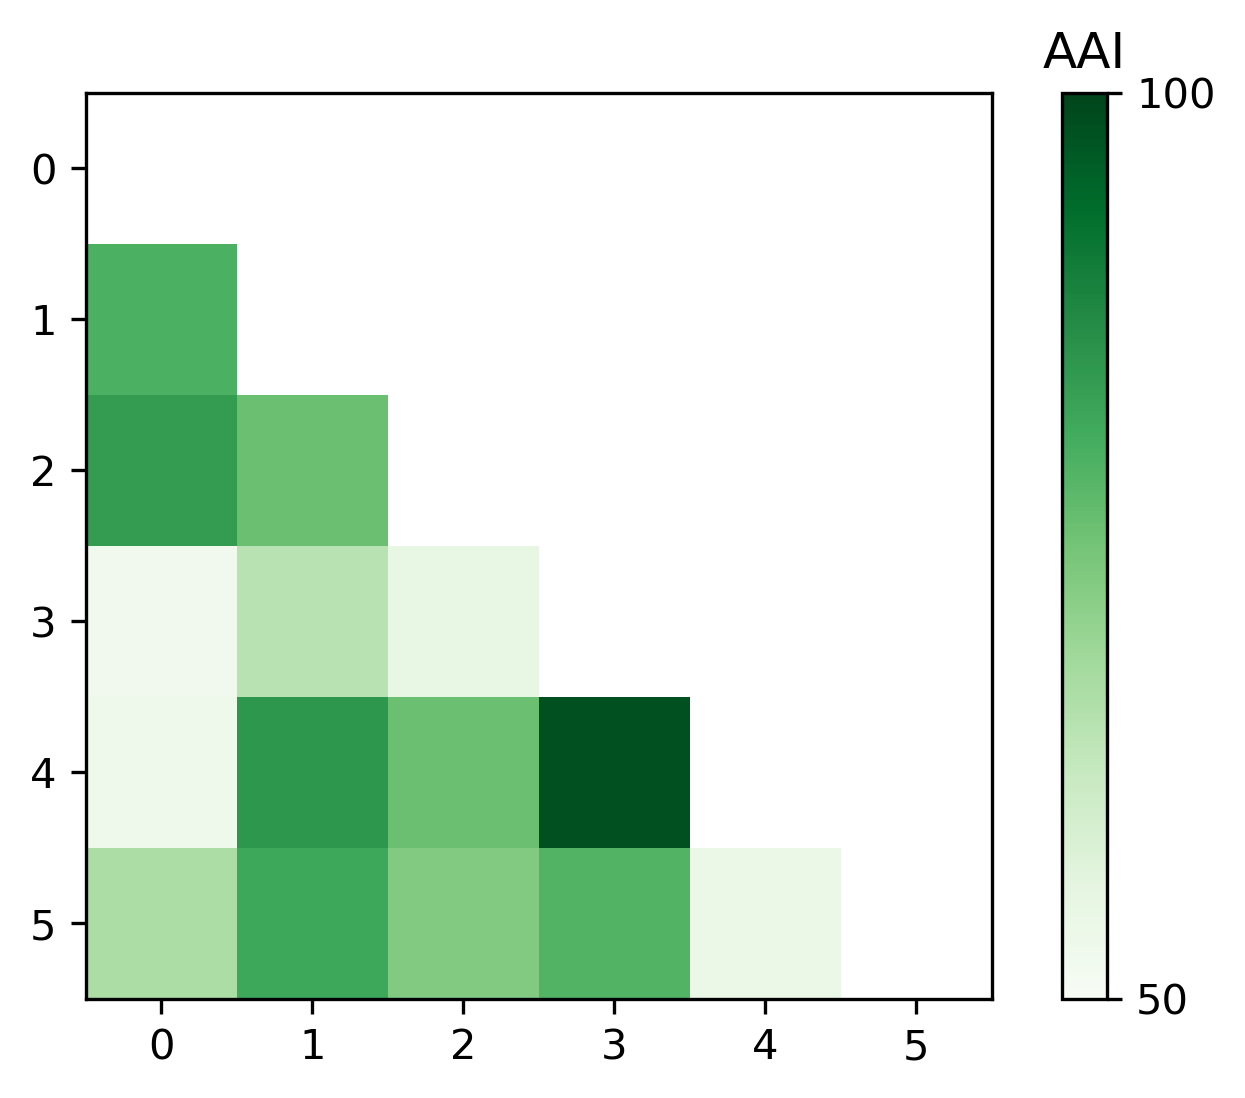

In [77]:
#AAI colorbar

fig, ax = plt.subplots(1,1, dpi = 300)
#vmin should match your data above and vmax should be 100
a = plt.imshow(my_plot_data * mask.T, cmap = cm.Greens, alpha = 1.0, vmin = 50, vmax = 100)
cb = plt.colorbar(a, ticks = [50, 100])
cb.ax.set_title("AAI")
plt.savefig('AAI', dpi = 300)